# Fire Modeling

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import matplotlib.animation as animation

## Crazy cool stuff from Eli/ChatGPT

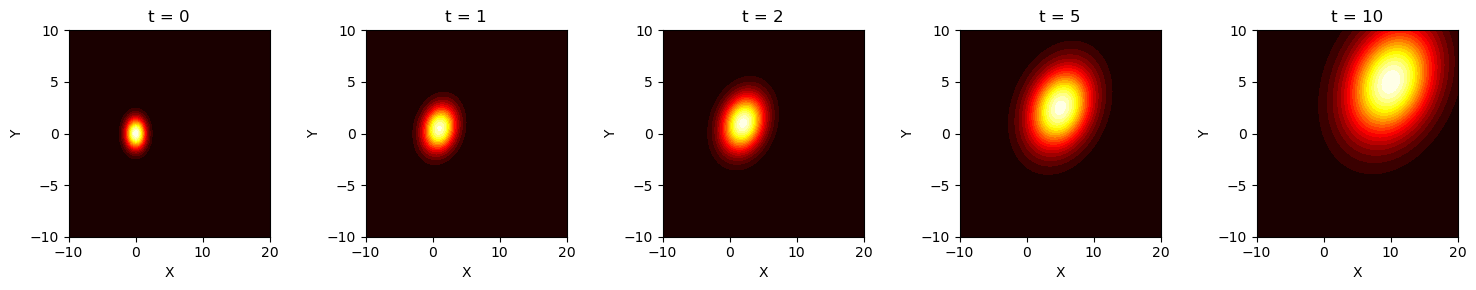

In [4]:
# Define parameters
x0, y0 = 0, 0   # Initial fire location
w1, w2 = 1, 0.5  # Wind vector
sigma0 = 1       # Initial standard deviation
k = 2            # Growth rate in wind direction
c = 1            # Growth rate perpendicular to wind
t_values = [0, 1, 2, 5, 10]  # Time steps to visualize

# Define the grid for plotting
x, y = np.linspace(-10, 20, 100), np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

# Compute wind unit vectors
wind_mag = np.sqrt(w1**2 + w2**2)
u_x, u_y = w1 / wind_mag, w2 / wind_mag  # Wind direction unit vector
u_perp_x, u_perp_y = -u_y, u_x          # Perpendicular direction unit vector

# Plot for each time step
fig, axes = plt.subplots(1, len(t_values), figsize=(15, 3))
for i, t in enumerate(t_values):
    mean = [x0 + w1 * t, y0 + w2 * t]  # Moving fire center
    
    # Compute time-dependent variances
    sigma_parallel = sigma0**2 + k * t
    sigma_perp = sigma0**2 + c * t
    
    # Compute covariance matrix
    Sigma = np.array([
        [u_x**2 * sigma_parallel + u_y**2 * sigma_perp, u_x * u_y * (sigma_parallel - sigma_perp)],
        [u_x * u_y * (sigma_parallel - sigma_perp), u_y**2 * sigma_parallel + u_x**2 * sigma_perp]
    ])
    
    # Evaluate multivariate normal distribution
    rv = multivariate_normal(mean, Sigma)
    Z = rv.pdf(np.dstack((X, Y)))
    
    # Plot heatmap
    ax = axes[i]
    ax.contourf(X, Y, 1*Z, levels=20, cmap='hot')
    ax.set_title(f't = {t}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_xlim(-10, 20)
    ax.set_ylim(-10, 10)
    
plt.tight_layout()
plt.show()

### Animate it

MovieWriter imagemagick unavailable; using Pillow instead.


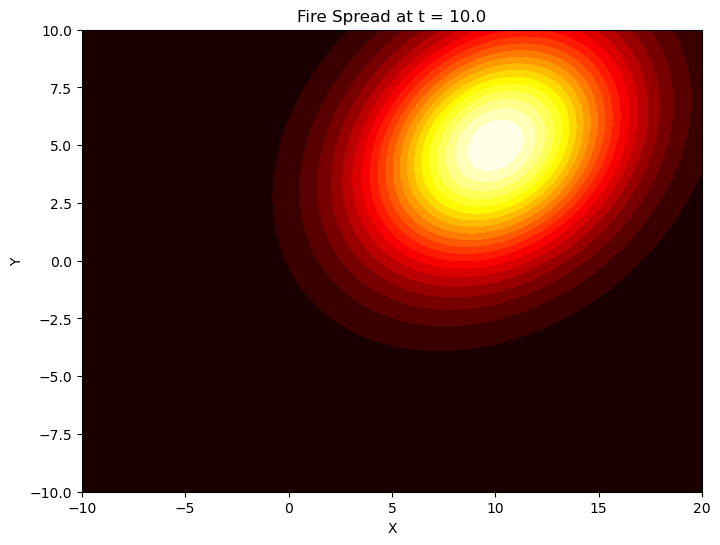

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import matplotlib.animation as animation

# Define parameters
x0, y0 = 0, 0   # Initial fire location
w1, w2 = 1, 0.5  # Wind vector
sigma0 = 1       # Initial standard deviation
k = 2            # Growth rate in wind direction
c = 1            # Growth rate perpendicular to wind
t_values = np.linspace(0, 10, 100)  # Time steps for animation

# Define the grid for plotting
x, y = np.linspace(-10, 20, 100), np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

# Compute wind unit vectors
wind_mag = np.sqrt(w1**2 + w2**2)
u_x, u_y = w1 / wind_mag, w2 / wind_mag  # Wind direction unit vector
u_perp_x, u_perp_y = -u_y, u_x          # Perpendicular direction unit vector

# Set up the figure
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(-10, 20)
ax.set_ylim(-10, 10)
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Initialize contour plot
contour = None

def update(t):
    global contour
    # Clear previous contour
    if contour is not None:
        for coll in contour.collections:
            coll.remove()
    
    # Compute new parameters
    mean = [x0 + w1 * t, y0 + w2 * t]
    sigma_parallel = sigma0**2 + k * t
    sigma_perp = sigma0**2 + c * t
    
    # Compute covariance matrix
    Sigma = np.array([
        [u_x**2 * sigma_parallel + u_y**2 * sigma_perp, 
         u_x * u_y * (sigma_parallel - sigma_perp)],
        [u_x * u_y * (sigma_parallel - sigma_perp), 
         u_y**2 * sigma_parallel + u_x**2 * sigma_perp]
    ])
    
    # Evaluate multivariate normal distribution
    rv = multivariate_normal(mean, Sigma)
    Z = rv.pdf(np.dstack((X, Y)))
    
    # Update contour plot
    contour = ax.contourf(X, Y, Z, levels=20, cmap='hot')
    ax.set_title(f'Fire Spread at t = {t:.1f}')
    return contour.collections

# Create animation
ani = animation.FuncAnimation(
    fig, 
    update, 
    frames=t_values,
    blit=True,  # Use blitting for efficiency
    interval=50,  # Update every 50 ms
    repeat=True
)

ani.save('fire_spread.gif', writer='imagemagick', fps=20)

MovieWriter imagemagick unavailable; using Pillow instead.


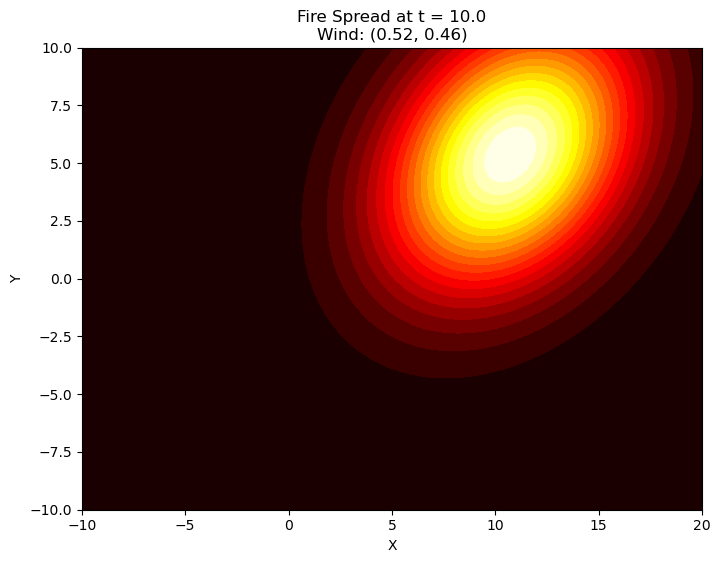

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import matplotlib.animation as animation

# Define parameters
x0, y0 = 0, 0        # Initial fire location
sigma0 = 1            # Initial standard deviation
k = 2                 # Growth rate in wind direction
c = 1                 # Growth rate perpendicular to wind
t_values = np.linspace(0, 10, 100)  # Time steps for animation

# Define the grid for plotting
x, y = np.linspace(-10, 20, 100), np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

# Set up the figure
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(-10, 20)
ax.set_ylim(-10, 10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
contour = None

def get_wind(t):
    """Time-varying wind vector with changing direction and magnitude"""
    w1 = 1 + 0.5*np.sin(0.5*t)  # Changing x-component
    w2 = 0.5 + 0.3*np.cos(0.8*t)  # Changing y-component
    return w1, w2

def update(t):
    global contour
    # Clear previous contour
    if contour is not None:
        for coll in contour.collections:
            coll.remove()
    
    # Get current wind vector
    w1, w2 = get_wind(t)
    
    # Compute wind direction unit vectors
    wind_mag = np.sqrt(w1**2 + w2**2)
    u_x, u_y = w1 / wind_mag, w2 / wind_mag
    u_perp_x, u_perp_y = -u_y, u_x
    
    # Compute fire center position (integrate wind over time)
    mean_x = x0 + (t - np.cos(0.5*t) + 1)  # Integral of w1 component
    mean_y = y0 + (0.5*t + 0.375*np.sin(0.8*t))  # Integral of w2 component
    
    # Compute time-dependent variances
    sigma_parallel = sigma0**2 + k * t
    sigma_perp = sigma0**2 + c * t
    
    # Compute rotated covariance matrix
    Sigma = np.array([
        [u_x**2 * sigma_parallel + u_y**2 * sigma_perp, 
         u_x * u_y * (sigma_parallel - sigma_perp)],
        [u_x * u_y * (sigma_parallel - sigma_perp), 
         u_y**2 * sigma_parallel + u_x**2 * sigma_perp]
    ])
    
    # Evaluate multivariate normal distribution
    rv = multivariate_normal([mean_x, mean_y], Sigma)
    Z = rv.pdf(np.dstack((X, Y)))
    
    # Update contour plot
    contour = ax.contourf(X, Y, Z, levels=20, cmap='hot')
    ax.set_title(f'Fire Spread at t = {t:.1f}\nWind: ({w1:.2f}, {w2:.2f})')
    return contour.collections

# Create animation
ani = animation.FuncAnimation(
    fig, 
    update, 
    frames=t_values,
    blit=True,
    interval=50,
    repeat=True
)

ani.save('fire_spread_dynamic_wind.gif', writer='imagemagick', fps=20)

MovieWriter Pillow unavailable; using Pillow instead.


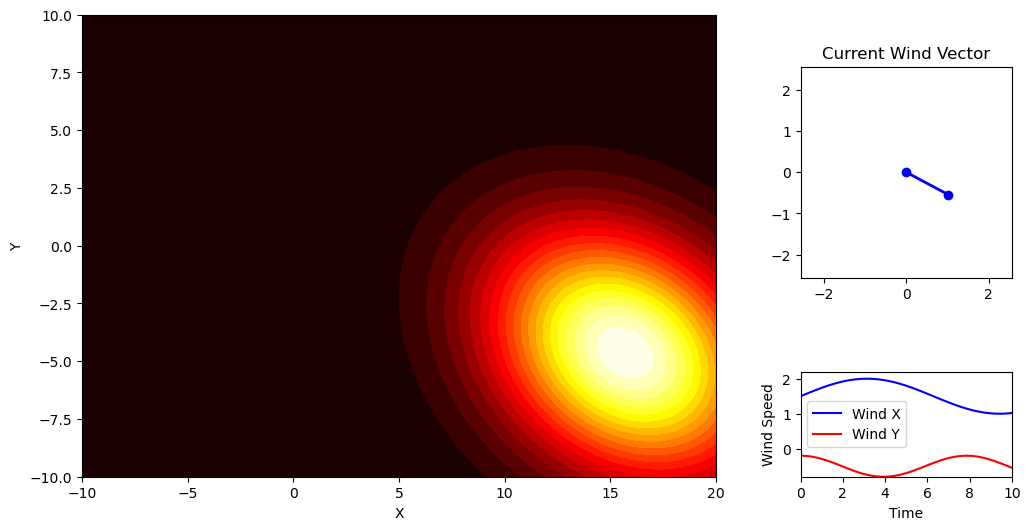

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import matplotlib.animation as animation

np.seterr(invalid='ignore')

# Parameters
x0, y0 = 0, 0
sigma0 = 1
k = 2
c = 1
t_values = np.linspace(0, 10, 100)

w1_init = 1.5
w2_init = -0.5

# Wind function with minimum magnitude
def get_wind(t):
    w1 = w1_init + 0.5 * np.sin(0.5 * t)
    w2 = w2_init + 0.3 * np.cos(0.8 * t)
    mag = np.hypot(w1, w2)
    if mag < 0.1:
        return w1 / mag * 0.1, w2 / mag * 0.1
    else:
        return w1, w2

w1_list, w2_list = zip(*[get_wind(t) for t in t_values])

# Create figure and set up grid layout
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(2, 2, width_ratios=[3, 1], height_ratios=[3, 1])

# Main fire spread plot
main_ax = fig.add_subplot(gs[:, 0])
main_ax.set(xlim=(-10, 20), ylim=(-10, 10), xlabel='X', ylabel='Y')

# Wind vector plot (line-based)
vector_ax = fig.add_subplot(gs[0, 1])
max_wind = max(np.hypot(w1, w2) for w1, w2 in zip(w1_list, w2_list)) * 1.2
vector_ax.set(xlim=(-max_wind, max_wind), ylim=(-max_wind, max_wind),
              aspect='equal', title='Current Wind Vector')

# Wind evolution plot
wind_ax = fig.add_subplot(gs[1, 1])
wind_ax.set(xlim=(0, 10), 
            ylim=(min(min(w1_list), min(w2_list)), max(max(w1_list), max(w2_list)) * 1.1),
            xlabel='Time', ylabel='Wind Speed')
wind_line1, = wind_ax.plot([], [], 'b-', label='Wind X')
wind_line2, = wind_ax.plot([], [], 'r-', label='Wind Y')
wind_ax.legend()

# Create mesh grid for fire spread density plot
X, Y = np.meshgrid(np.linspace(-10, 20, 100), np.linspace(-10, 10, 100))
contour = None

def update(i):
    global contour
    t = t_values[i]
    w1, w2 = w1_list[i], w2_list[i]
    
    # Update the main fire plot
    if contour is not None:
        for coll in contour.collections:
            coll.remove()
    
    wind_mag = np.hypot(w1, w2)
    if wind_mag > 0:
        u_x, u_y = w1 / wind_mag, w2 / wind_mag
    else:
        u_x, u_y = 1, 0

    mean_x = x0 + (w1_init * t - np.cos(0.5 * t) + 1)
    mean_y = y0 + (w2_init * t + 0.375 * np.sin(0.8 * t))
    
    sigma_parallel = sigma0**2 + k * t
    sigma_perp = sigma0**2 + c * t
    
    Sigma = np.array([
        [u_x**2 * sigma_parallel + u_y**2 * sigma_perp,
         u_x * u_y * (sigma_parallel - sigma_perp)],
        [u_x * u_y * (sigma_parallel - sigma_perp),
         u_y**2 * sigma_parallel + u_x**2 * sigma_perp]
    ])
    
    rv = multivariate_normal([mean_x, mean_y], Sigma)
    Z = rv.pdf(np.dstack((X, Y)))
    contour = main_ax.contourf(X, Y, Z, levels=20, cmap='hot')
    
    # Update wind vector plot by clearing and replotting a line
    vector_ax.clear()
    vector_ax.set(xlim=(-max_wind, max_wind), ylim=(-max_wind, max_wind),
                  aspect='equal', title='Current Wind Vector')
    # Plot a line from (0,0) to (w1, w2)
    color = 'blue' if w1 >= 0 else 'red'
    vector_ax.plot([0, w1], [0, w2], color=color, linewidth=2, marker='o')
    
    # Update wind evolution plot
    wind_line1.set_data(t_values[:i+1], w1_list[:i+1])
    wind_line2.set_data(t_values[:i+1], w2_list[:i+1])
    
    # Return updated artists from the main and evolution plots.
    return [*contour.collections, wind_line1, wind_line2]

# Create animation without blitting to avoid redraw issues
ani = animation.FuncAnimation(
    fig, update, frames=len(t_values),
    interval=50, repeat=True
)

ani.save('fire_spread_with_wind.gif', writer='Pillow', fps=20)
plt.show()
